In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels.api as sm

from sklearn.datasets import load_boston
boston = load_boston()
boston_master = pd.DataFrame(boston.data)

boston_master = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_master['Target'] = pd.Series(boston.target)

In [4]:
boston_master.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [5]:
boston_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# boston_master.isnull().sum()
X = boston_master['RM']
y = boston_master['Target']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


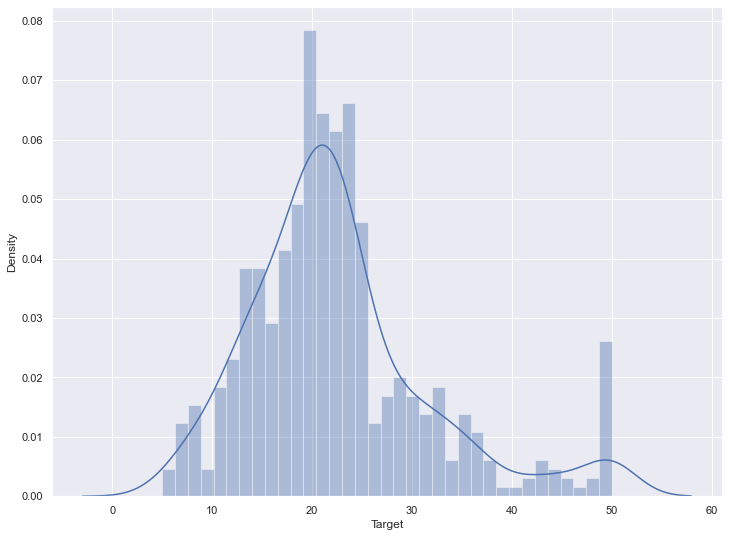

In [7]:
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(boston_master['Target'], bins=35)
plt.show()

<AxesSubplot:>

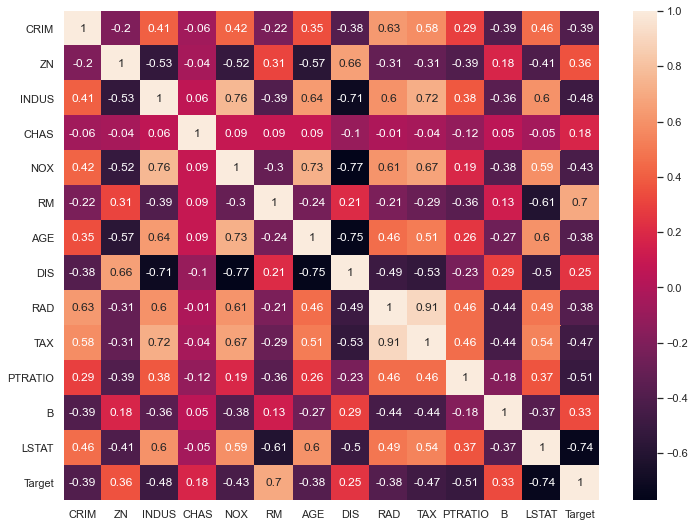

In [8]:
correlation_matrix = boston_master.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Since the corr value for RM is maximum, we build our Linear Regressor based on that column.

In [9]:
boston_master.reset_index(drop=True, inplace=True)

In [10]:
boston_master.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [11]:
# boston_master.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1,1)

In [13]:
from sklearn.linear_model import LinearRegression
house_regressor = LinearRegression()
house_regressor.fit(X_train ,y_train)

LinearRegression()

In [14]:
house_regressor.predict(y_test)

array([[174.44166525],
       [429.57205418],
       [178.16619648],
       [ 41.28967395],
       [161.40580596],
       [149.30107948],
       [155.81900912],
       [138.1274858 ],
       [113.91803284],
       [137.196353  ],
       [ 45.94533798],
       [124.16049371],
       [102.74443916],
       [ 61.77459569],
       [429.57205418],
       [234.03416486],
       [178.16619648],
       [274.07287553],
       [237.75869608],
       [159.54354035],
       [185.61525893],
       [141.85201703],
       [153.95674351],
       [234.96529766],
       [143.71428264],
       [179.09732928],
       [146.50768106],
       [144.64541545],
       [324.35404707],
       [138.1274858 ],
       [ 99.95104075],
       [150.23221229],
       [154.88787632],
       [151.16334509],
       [183.75299331],
       [120.43596248],
       [ 16.14908818],
       [429.57205418],
       [ 99.01990794],
       [ 87.84631426],
       [186.54639173],
       [150.23221229],
       [148.36994667],
       [ 92

In [15]:
model = sm.OLS(y_train, X_train).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              3314.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                   1.69e-181
Time:                        06:56:44   Log-Likelihood:                         -1220.9
No. Observations:                 354   AIC:                                      2444.
Df Residuals:                     353   BIC:                                      2448.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.6752      0.064     57.568      0.000       3.550       3.801
==============================================================================
Omnibus:                       57.741   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.031
Skew:                           0.951   Prob(JB):                     8.51e-22
Kurtosis:                       4.721   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X_train.reset_index(drop=True, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [ ]:
y_train.reset_index(drop=True, inplace=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
# print(house_regressor.intercept_)
# print(house_regressor.coef_)

In [ ]:
X_test = pd.DataFrame(X_test)


In [ ]:
# y_pred = house_regressor.predict(X_test)
